In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Pandas and stats
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

from pathlib import Path

# path for the database files
import sys
sys.path.append("../")

In [3]:
# Python SQL toolkit and Object Relational Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, and_

# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite database

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# Create the inspector to examine the db
inspector = inspect(engine)


In [6]:
# One way to get all of the table names in the database.  More SQL-like

table_names = inspector.get_table_names()
table_names


['measurement', 'station']

In [7]:
# Pythonic way to reflect the database into a model and get automapped class names

Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table located
# Assign the classes to variables`

measurement = Base.classes.measurement  

station = Base.classes.station


In [9]:
# Create a session connected to the database
session = Session(bind=engine)

In [10]:
# Use the inspector to print the column names within the 'station' table and their data types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Use the inspector to print the column names within the 'measurement' table and their data types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Use the session to query and display station table
for row in session.query(station.station, station.name, station.latitude, station.longitude, station.elevation).limit(15).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [13]:
# Use the session to query and display measurement table
for row in session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).limit(15).all():
    print(row)

('USC00519397', '2010-01-01', 0.08, 65.0)
('USC00519397', '2010-01-02', 0.0, 63.0)
('USC00519397', '2010-01-03', 0.0, 74.0)
('USC00519397', '2010-01-04', 0.0, 76.0)
('USC00519397', '2010-01-06', None, 73.0)
('USC00519397', '2010-01-07', 0.06, 70.0)
('USC00519397', '2010-01-08', 0.0, 64.0)
('USC00519397', '2010-01-09', 0.0, 68.0)
('USC00519397', '2010-01-10', 0.0, 73.0)
('USC00519397', '2010-01-11', 0.01, 64.0)
('USC00519397', '2010-01-12', 0.0, 61.0)
('USC00519397', '2010-01-14', 0.0, 66.0)
('USC00519397', '2010-01-15', 0.0, 65.0)
('USC00519397', '2010-01-16', 0.0, 68.0)
('USC00519397', '2010-01-17', 0.0, 64.0)


#### Define a function to get the last precipitation date and the date one year earlier for use in querying the last twelve months of data

In [14]:
# define the function.  It  takes an optional parameter for a specific station id.  If no station is provided,
# get most recent date for the entire dataset
    
def get_precip_dates(station_id = ""):    

    # Starting from the most recent data point in the database. 
    # This query returns a row, even for one field, so get value of first (0th) item in the row

    if station_id == "":
        last_precip_date_str = session.query(measurement.date).\
        order_by((measurement.date).desc()).first()[0]
    else:
        last_precip_date_str = session.query(measurement.date).\
        filter(measurement.station == station_id).\
        order_by((measurement.date).desc()).first()[0]
        
    # Calculate the date one year prior to the most recent date

    date_format = "%Y-%m-%d"
    most_recent_date = dt.datetime.strptime(last_precip_date_str, date_format).date()
    print(f"most recent date: {most_recent_date}")

    prior_year_date = most_recent_date - relativedelta(days=365)
    print(f"prior year date: {prior_year_date}")
    
    return most_recent_date, prior_year_date


# Exploratory Precipitation Analysis

In [15]:
# The dates have to be defined in the same cell as the query
# or jupyter notebook sees them as undefined 

# Call function to query the most recent date and one year previous to that.
most_recent_date, prior_year_date  = get_precip_dates()

# Query to retrieve the last 12 months of precipitation data 
precip_list = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= prior_year_date).\
    order_by(measurement.date).all()

# print the list of dates and amounts of preciptation
precip_list

most recent date: 2017-08-23
prior year date: 2016-08-23


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

<Figure size 1200x1000 with 0 Axes>

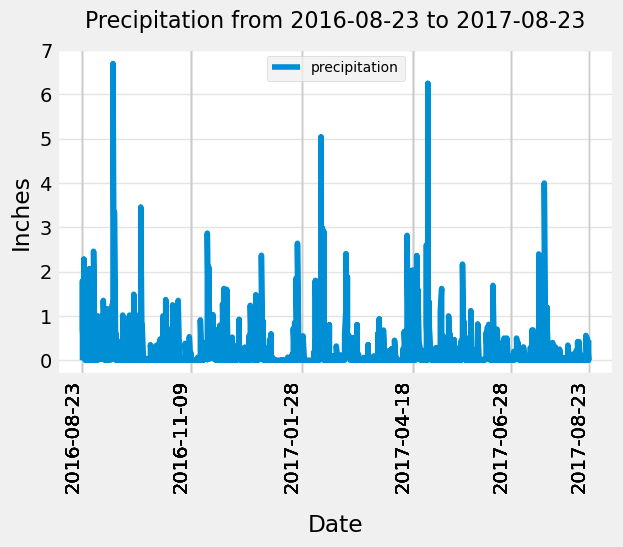

In [16]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_list, columns=['date', 'precipitation'])

# Convert the 'date' column to datetime type
precip_df['date'] = pd.to_datetime(precip_df['date'])

# Drop NaN values
precip_df.dropna(inplace=True)

# Sort the dataframe by date
precip_df.set_index('date', inplace=True)

# Set the size of the figure
fig = plt.figure(facecolor='white', figsize=(12, 10))

# Define the xtick labels
x_lbls = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-06-28', '2017-08-23']
x_lbls_datetime = pd.to_datetime(x_lbls)

# Define the positions for the x-ticks

# Calculating the positions for the x-tick labels and getting them to 
# display properly in juypter notebook required much research on
# Stack Overflow and matplotlib documentation.  ChatGPT
# had many suggestions that did not work.  

xtickpos = precip_df.index[precip_df.index.isin(x_lbls_datetime)]

# Check if all xtickpos exist in x_lbls_datetime
xtickpos = xtickpos[xtickpos.isin(x_lbls_datetime)]

# Get corresponding labels for existing xtickpos
xtick_lbls = [str(date.date()) for date in xtickpos]

ax = precip_df.plot(y='precipitation')
ax.grid(alpha = .5)
ax.set_facecolor('white')

# Set the title and the axis labels
plt.title(f'Precipitation from {prior_year_date} to {most_recent_date}', pad=15, fontsize=16)
plt.xlabel('Date', labelpad=15)
plt.ylabel('Inches', labelpad=5)
plt.legend(loc='upper center', fontsize=10)

# Update x-ticks
plt.xticks(xtickpos, xtick_lbls, rotation=90, ha='right')

plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_stats = precip_df['precipitation'].describe()

print(summary_stats)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [18]:
# Query to calculate the total number of stations in the dataset

station_count = session.query(station).group_by(station.station).count()
station_count

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# Define the query
query = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc())

# Execute the query and retrieve the results
stations_list = query.all()

# Print the stations and their counts
for station, count in stations_list:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [20]:
# Get the most active station from the above query
most_active_station = stations_list[0]['station']

print(f"Most active station: {most_active_station}")


Most active station: USC00519281


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# set up the query
station_query = session.query(func.min(measurement.tobs).label('min_temp'),
                              func.max(measurement.tobs).label('max_temp'),
                              func.avg(measurement.tobs).label('avg_temp')).\
                filter(measurement.station == most_active_station)

# execute the query
active_station_list = station_query.all()

# Print the min, max, and average values for this station

print(f"Station: {most_active_station}")

# print the details if there is emperature data for this station

if len(active_station_list) > 0:
    print(f"   Min: {active_station_list[0].min_temp}")
    print(f"   Max: {active_station_list[0].max_temp}")
    print(f"   Avg: {active_station_list[0].avg_temp}")


Station: USC00519281
   Min: 54.0
   Max: 85.0
   Avg: 71.66378066378067


In [22]:
# Query last 12 months of temperature observation data for 
# the most active station and plot results as a histogram with bins = 12


# Call function to get the most recent date and one year previous to that.
most_recent_date, prior_year_date  = get_precip_dates(most_active_station)

# set up the query

station_12_mo_query = session.query(measurement.tobs.label('temperature'),
                                   func.count(measurement.tobs).label('frequency')).\
                    filter(and_(measurement.station == most_active_station,
                                measurement.date >= prior_year_date)).\
                    group_by(measurement.tobs).\
                    order_by(measurement.tobs)

# execute the query
station_12_mo_list = station_12_mo_query.all()

# print results
station_12_mo_list

most recent date: 2017-08-18
prior year date: 2016-08-18


[(59.0, 3),
 (60.0, 2),
 (61.0, 1),
 (62.0, 6),
 (63.0, 4),
 (64.0, 3),
 (65.0, 7),
 (66.0, 5),
 (67.0, 15),
 (68.0, 12),
 (69.0, 19),
 (70.0, 22),
 (71.0, 18),
 (72.0, 22),
 (73.0, 18),
 (74.0, 39),
 (75.0, 33),
 (76.0, 33),
 (77.0, 31),
 (78.0, 23),
 (79.0, 20),
 (80.0, 12),
 (81.0, 5),
 (82.0, 3),
 (83.0, 1)]

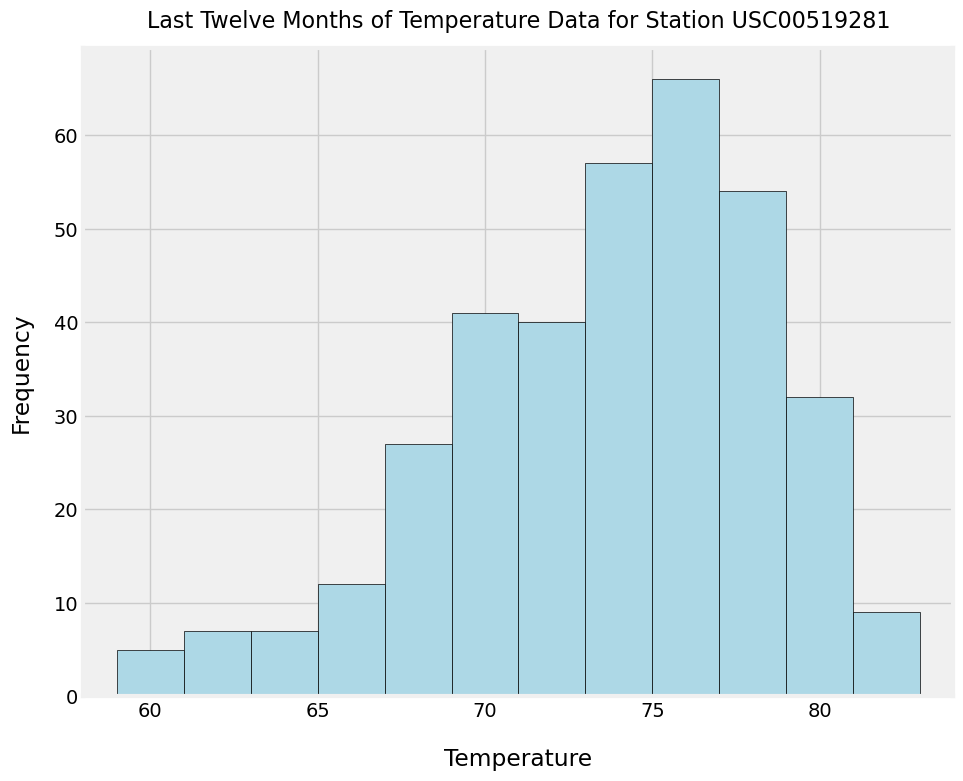

In [23]:
# Save the temperature query results for this station as a Pandas DataFrame, expcitly setting the column names
station_temp_df = pd.DataFrame(station_12_mo_list, columns=['temperature', 'frequency'])

# Drop NaN values
station_temp_df.dropna(inplace=True)

# Sort the dataframe by date
# station_temp_df.set_index('temperature', inplace=True)

# Get the frequency and temperature columns from the DataFrame
temperatures = station_temp_df['temperature']
frequencies = station_temp_df['frequency']

# Set the size of the figure
fig = plt.figure(facecolor='white', figsize=(10, 8))

# Create the histogram plot
plt.hist(temperatures, bins=12, weights=frequencies, color='lightblue', edgecolor='black')


# Set the title, the axis labels, and the x-axis limits
plt.title(f'Last Twelve Months of Temperature Data for Station {most_active_station}', pad=15, fontsize=16)
plt.xlabel('Temperature', labelpad=20)
plt.ylabel('Frequency', labelpad=15)
plt.xlim((min(temperatures)-1), (max(temperatures)+1))

# Show the plot
plt.show()

# Close Session

In [25]:
# Close Session
session.close()